In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [17]:
file_path = '../../datasets/px100_configuration_data/px100_configuration_data.csv'
data = pd.read_csv(file_path)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   x         1000 non-null   float64
 1   y         1000 non-null   float64
 2   z         1000 non-null   float64
 3   pitch     1000 non-null   float64
 4   yaw       1000 non-null   float64
 5   waist     1000 non-null   float64
 6   shoulder  1000 non-null   float64
 7   elbow     1000 non-null   float64
 8   wrist     1000 non-null   float64
dtypes: float64(9)
memory usage: 70.4 KB


In [ ]:
# computing average max distance
num_of_rows = 20
largest_pairs = data.nlargest(num_of_rows, ['y', 'z'])

distances = []

for index, row in largest_pairs.iterrows():
    dist = np.sqrt( row['y']**2 + row['z']**2 )
    distances.append(dist)

print(sum(distances) / num_of_rows)

KeyError: 'y'

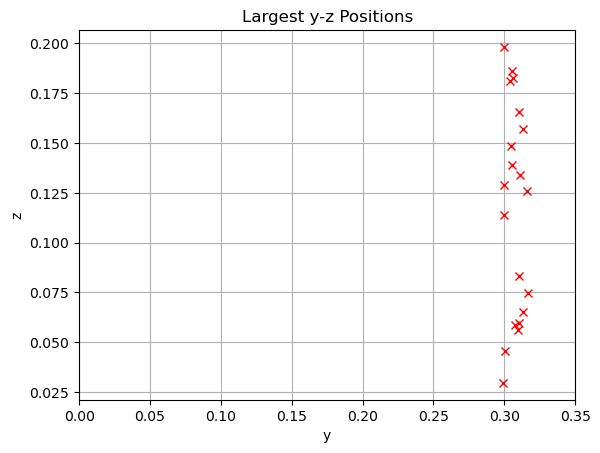

In [46]:
plt.plot(largest_pairs.loc[:, 'y'], largest_pairs.loc[:, 'z'], 'xr')
plt.xlabel('y')
plt.xlim([0, 0.35])
plt.ylabel('z')
plt.title('Largest y-z Positions')
plt.grid(True)
plt.show()

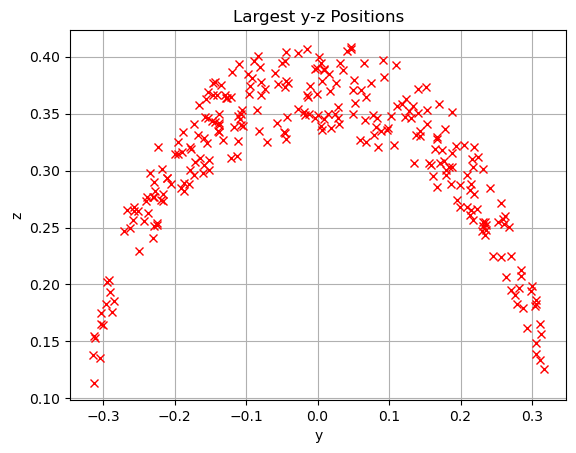

In [52]:
# filter out everything that has a distance < 0.3
def isFar(y, z):
    threshold = 0.33
    return np.sqrt(y**2 + z**2) >= threshold

largest_points = data.loc[isFar(data['y'], data['z'])]
largest_points

plt.plot(largest_points.loc[:, 'y'], largest_points.loc[:, 'z'], 'xr')
plt.xlabel('y')
# plt.xlim([0, 0.35])
plt.ylabel('z')
plt.title('Largest y-z Positions')
plt.grid(True)
plt.show()